In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from evaluation_metrics import optimism_ratio, pessimism_ratio
from models import RNN, GRU, LSTM
from data import pull_data, make_train_test

In [2]:
# compile results for passed models into dataframe
def tabulate(X, y, models, metrics):
    """
    X - features
    y - true output
    models - dict of torch models
    metrics - dict of metrics with form func(y_true, y_pred)
    """
    if type(y) == torch.Tensor:
        y = y.numpy()
    tab = pd.DataFrame(index=metrics.keys())
    for m in models.keys():
        models[m].eval()
        pred = models[m](X)
        pred = pred.detach().numpy()
        mets = list()
        for met in tab.index:
            if met == "RMSE":
                mets.append(metrics[met](y, pred, squared=False))
            else:
                mets.append(metrics[met](y, pred))
        tab[m] = mets
        
    return tab

In [3]:
# create train and test datasets
data = pull_data("AAPL")
train_x, train_y, test_x, test_y = make_train_test(data)

[*********************100%***********************]  1 of 1 completed


In [4]:
# define input and output sizes for all models
input_size = 1
output_size = 1

### RNNs

In [5]:
# train RNN with 1 hidden layer
epochs = 100
lr = 0.05
rnn1 = RNN(input_size, hidden_size=32, num_layers=1, output_size=output_size, nonlinearity="relu")
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(rnn1.parameters(), lr=lr)

hist_rnn1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_rnn1 = rnn1(train_x)
    loss = criterion(output_rnn1, train_y)
    loss.backward()
    optimizer.step()
    hist_rnn1.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0265
Epoch: 20/100.......... Loss: 0.0158
Epoch: 30/100.......... Loss: 0.0125
Epoch: 40/100.......... Loss: 0.0076
Epoch: 50/100.......... Loss: 0.0027
Epoch: 60/100.......... Loss: 0.0001
Epoch: 70/100.......... Loss: 0.0004
Epoch: 80/100.......... Loss: 0.0000
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0000


In [10]:
# train RNN with 2 hidden layers
epochs = 100
lr = 0.05
rnn2 = RNN(input_size, hidden_size=32, num_layers=2, output_size=output_size, nonlinearity="relu")
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(rnn2.parameters(), lr=lr)

hist_rnn2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_rnn2 = rnn2(train_x)
    loss = criterion(output_rnn2, train_y)
    loss.backward()
    optimizer.step()
    hist_rnn2.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0409
Epoch: 20/100.......... Loss: 0.0279
Epoch: 30/100.......... Loss: 0.0229
Epoch: 40/100.......... Loss: 0.0192
Epoch: 50/100.......... Loss: 0.0138
Epoch: 60/100.......... Loss: 0.0062
Epoch: 70/100.......... Loss: 0.0004
Epoch: 80/100.......... Loss: 0.0008
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [17]:
# train RNN with 3 hidden layers
epochs = 100
lr = 0.01
rnn3 = RNN(input_size, hidden_size=32, num_layers=3, output_size=output_size, nonlinearity="relu")
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(rnn3.parameters(), lr=lr)

hist_rnn3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_rnn3 = rnn3(train_x)
    loss = criterion(output_rnn3, train_y)
    loss.backward()
    optimizer.step()
    hist_rnn3.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0324
Epoch: 20/100.......... Loss: 0.0315
Epoch: 30/100.......... Loss: 0.0246
Epoch: 40/100.......... Loss: 0.0209
Epoch: 50/100.......... Loss: 0.0167
Epoch: 60/100.......... Loss: 0.0087
Epoch: 70/100.......... Loss: 0.0010
Epoch: 80/100.......... Loss: 0.0007
Epoch: 90/100.......... Loss: 0.0003
Epoch: 100/100.......... Loss: 0.0002


### GRUs

In [18]:
# train GRU with 1 hidden layer
epochs = 100
lr = 0.01
gru1 = GRU(input_size, hidden_size=32, num_layers=1, output_size=output_size)
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(gru1.parameters(), lr=lr)

hist_gru1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_gru1 = gru1(train_x)
    loss = criterion(output_gru1, train_y)
    loss.backward()
    optimizer.step()
    hist_gru1.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0200
Epoch: 20/100.......... Loss: 0.0209
Epoch: 30/100.......... Loss: 0.0157
Epoch: 40/100.......... Loss: 0.0107
Epoch: 50/100.......... Loss: 0.0071
Epoch: 60/100.......... Loss: 0.0043
Epoch: 70/100.......... Loss: 0.0008
Epoch: 80/100.......... Loss: 0.0005
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [19]:
# train GRU with 2 layers
epochs = 100
lr = 0.01
gru2 = GRU(input_size, hidden_size=32, num_layers=2, output_size=output_size)
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(gru2.parameters(), lr=lr)

hist_gru2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_gru2 = gru2(train_x)
    loss = criterion(output_gru2, train_y)
    loss.backward()
    optimizer.step()
    hist_gru2.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0559
Epoch: 20/100.......... Loss: 0.0226
Epoch: 30/100.......... Loss: 0.0192
Epoch: 40/100.......... Loss: 0.0111
Epoch: 50/100.......... Loss: 0.0030
Epoch: 60/100.......... Loss: 0.0013
Epoch: 70/100.......... Loss: 0.0003
Epoch: 80/100.......... Loss: 0.0002
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [20]:
# train GRU with 3 layers
epochs = 100
lr = 0.01
gru3 = GRU(input_size, hidden_size=32, num_layers=3, output_size=output_size)
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(gru3.parameters(), lr=lr)

hist_gru3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_gru3 = gru3(train_x)
    loss = criterion(output_gru3, train_y)
    loss.backward()
    optimizer.step()
    hist_gru3.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0364
Epoch: 20/100.......... Loss: 0.0381
Epoch: 30/100.......... Loss: 0.0204
Epoch: 40/100.......... Loss: 0.0096
Epoch: 50/100.......... Loss: 0.0032
Epoch: 60/100.......... Loss: 0.0015
Epoch: 70/100.......... Loss: 0.0007
Epoch: 80/100.......... Loss: 0.0004
Epoch: 90/100.......... Loss: 0.0002
Epoch: 100/100.......... Loss: 0.0002


### LSTMs

In [21]:
# train LSTM with 1 hidden layer
epochs = 100
lr = 0.01
lstm1 = LSTM(input_size, hidden_size=32, output_size=output_size, num_layers=1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=lr)

hist_lstm1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_lstm1 = lstm1(train_x)
    loss = criterion(output_lstm1, train_y)
    loss.backward()
    optimizer.step()
    hist_lstm1.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0218
Epoch: 20/100.......... Loss: 0.0181
Epoch: 30/100.......... Loss: 0.0182
Epoch: 40/100.......... Loss: 0.0135
Epoch: 50/100.......... Loss: 0.0074
Epoch: 60/100.......... Loss: 0.0024
Epoch: 70/100.......... Loss: 0.0004
Epoch: 80/100.......... Loss: 0.0004
Epoch: 90/100.......... Loss: 0.0002
Epoch: 100/100.......... Loss: 0.0002


In [22]:
# train LSTM with 2 hidden layers
epochs = 100
lr = 0.01
lstm2 = LSTM(input_size, hidden_size=32, output_size=output_size, num_layers=2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm2.parameters(), lr=lr)

hist_lstm2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_lstm2 = lstm2(train_x)
    loss = criterion(output_lstm2, train_y)
    loss.backward()
    optimizer.step()
    hist_lstm2.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0622
Epoch: 20/100.......... Loss: 0.0293
Epoch: 30/100.......... Loss: 0.0256
Epoch: 40/100.......... Loss: 0.0184
Epoch: 50/100.......... Loss: 0.0035
Epoch: 60/100.......... Loss: 0.0010
Epoch: 70/100.......... Loss: 0.0003
Epoch: 80/100.......... Loss: 0.0002
Epoch: 90/100.......... Loss: 0.0002
Epoch: 100/100.......... Loss: 0.0002


In [23]:
# train LSTM with 3 hidden layers
epochs = 100
lr = 0.01
lstm3 = LSTM(input_size, hidden_size=32, output_size=output_size, num_layers=3)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm3.parameters(), lr=lr)

hist_lstm3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_lstm3 = lstm3(train_x)
    loss = criterion(output_lstm3, train_y)
    loss.backward()
    optimizer.step()
    hist_lstm3.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0404
Epoch: 20/100.......... Loss: 0.0314
Epoch: 30/100.......... Loss: 0.0304
Epoch: 40/100.......... Loss: 0.0188
Epoch: 50/100.......... Loss: 0.0033
Epoch: 60/100.......... Loss: 0.0020
Epoch: 70/100.......... Loss: 0.0007
Epoch: 80/100.......... Loss: 0.0005
Epoch: 90/100.......... Loss: 0.0002
Epoch: 100/100.......... Loss: 0.0002


In [32]:
metrics = {"RMSE": mean_squared_error, "R-Squared": r2_score, "OR": optimism_ratio, "PR": pessimism_ratio}
models = {"1-Layer RNN": rnn1, "1-Layer GRU": gru1, "1-Layer LSTM": lstm1,
         "2-Layer RNN": rnn2, "2-Layer GRU": gru2, "2-Layer LSTM": lstm2,
         "3-Layer RNN": rnn3, "3-Layer GRU": gru3, "3-Layer LSTM": lstm3}
tab = tabulate(test_x, test_y, models, metrics)
tab.columns = tab.columns.str.split(" ", expand=True)
print("Results:")
tab

Results:


1-Layer                       2-Layer                      \
                RNN       GRU      LSTM       RNN       GRU      LSTM   
RMSE       0.363545  0.072379  0.317293  0.472509  0.037641  0.323368   
R-Squared -0.304314  0.948299  0.006454 -1.203365  0.986017 -0.031952   
OR         0.110226  0.116202  0.004648  0.001328  0.676627  0.060425   
PR         0.968792  0.954847  0.998008  0.999336  0.397742  0.962815   

            3-Layer                      
                RNN       GRU      LSTM  
RMSE       0.465643  0.058103  0.412631  
R-Squared -1.139798  0.966683 -0.680310  
OR         0.045153  0.779548  0.027888  
PR         0.985392  0.262948  0.992696

In [45]:
rnn_outs = {"RNN-1": (output_rnn1, hist_rnn1), "RNN-2": (output_rnn2, hist_rnn2), "RNN-3": (output_rnn3, hist_rnn3)}
gru_outs = {"GRU-1": (output_gru1, hist_gru1), "GRU-2": (output_gru2, hist_gru2), "GRU-3": (output_gru3, hist_gru3)}
lstm_outs = {"LSTM-1": (output_lstm1, hist_lstm1), "LSTM-2": (output_lstm2, hist_lstm2), "LSTM-3": (output_lstm3, hist_lstm3)}
outs = [rnn_outs, gru_outs, lstm_outs]

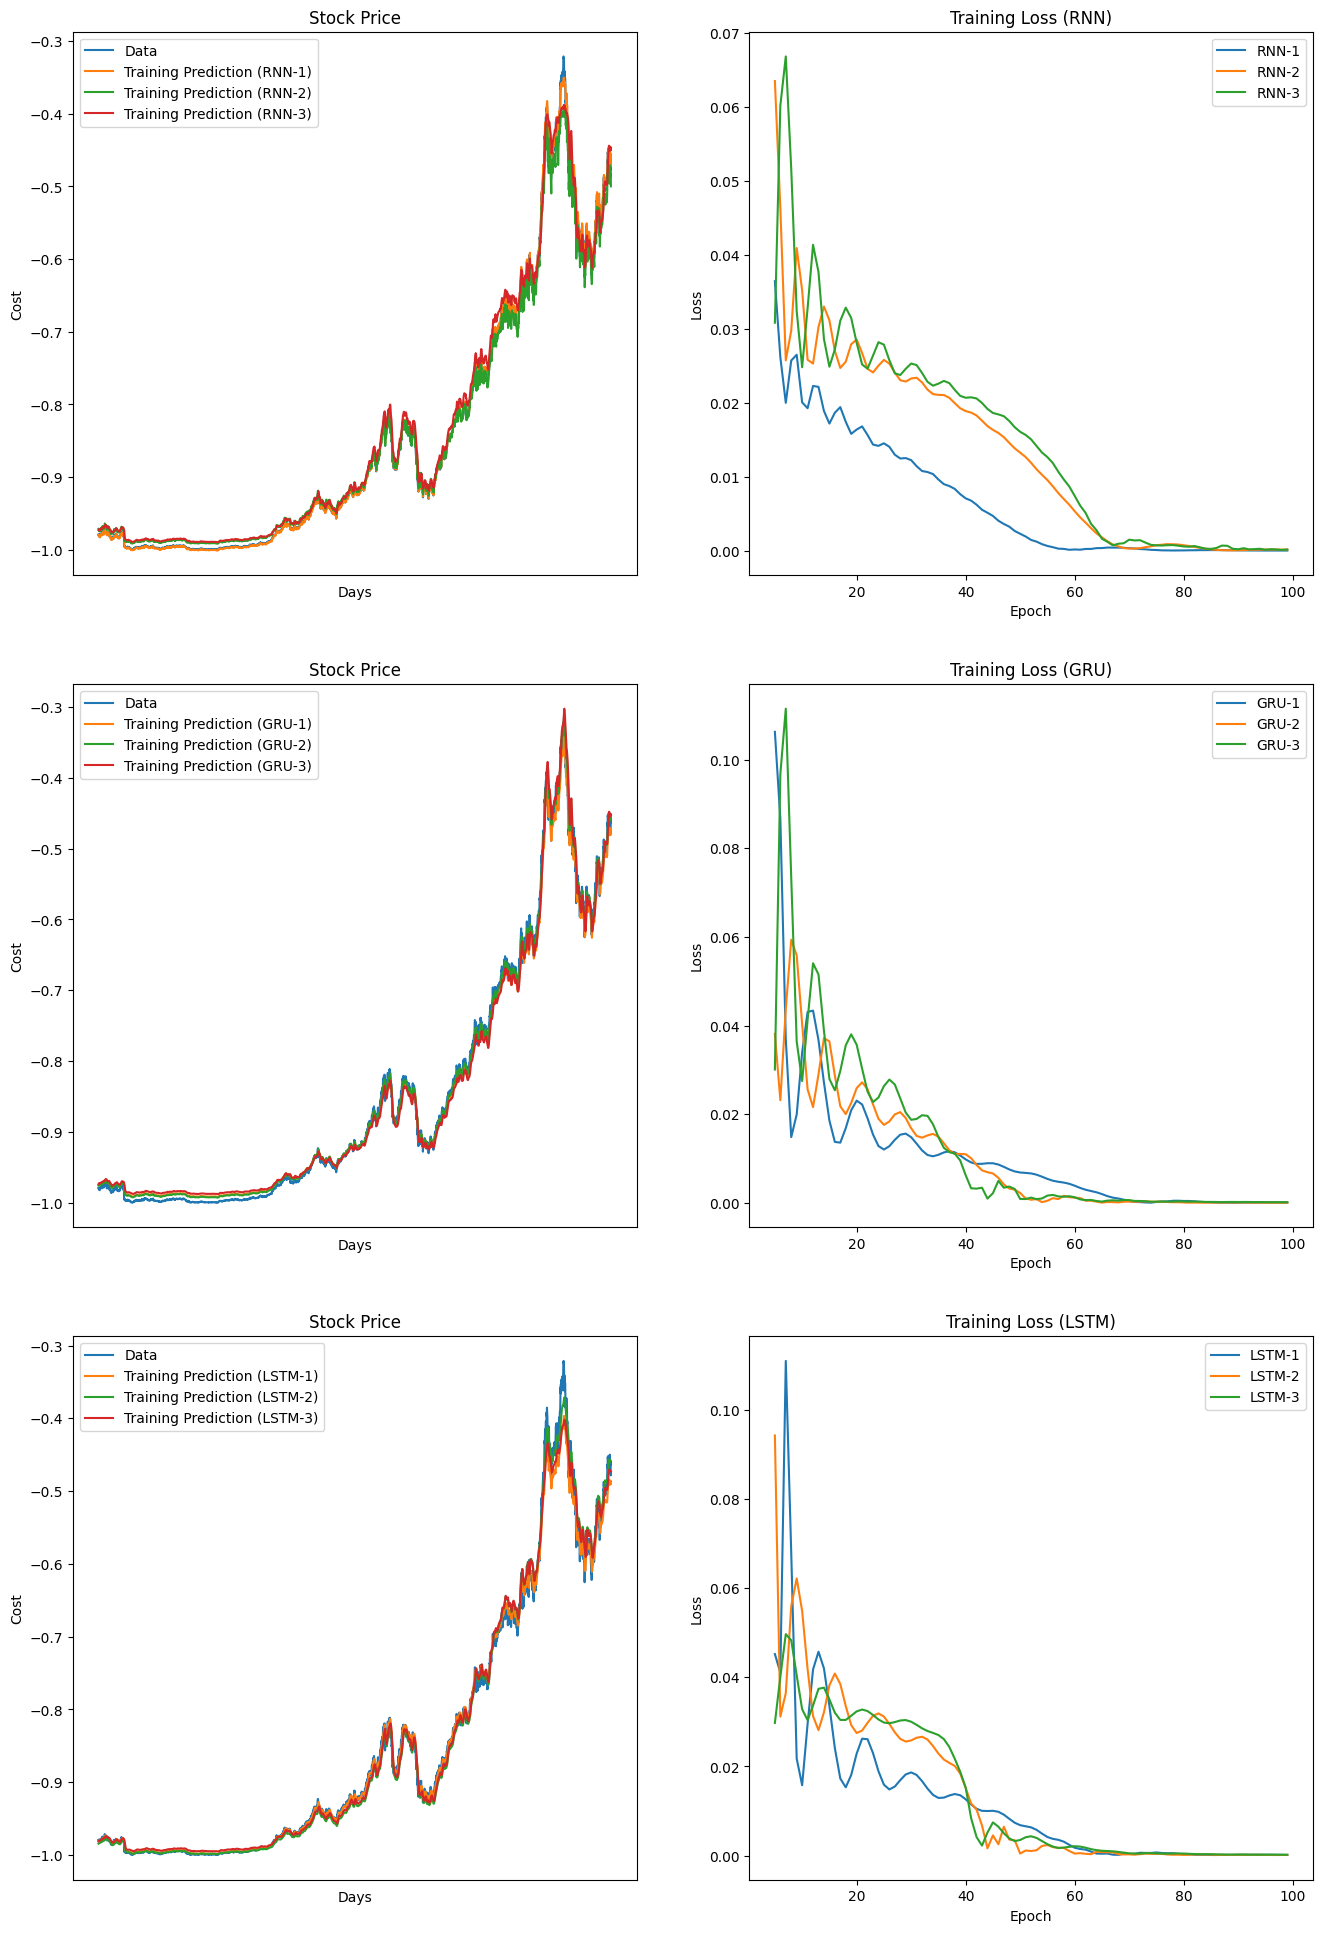

In [46]:
# display training predictions and loss
fig, ax = plt.subplots(3, 2, figsize=(16, 24))
for i in range(3):
    ax[i][0].plot(range(train_y.shape[0]), train_y, label="Data")
    for o in outs[i].keys():
        ax[i][0].plot(range(outs[i][o][0].shape[0]), outs[i][o][0].detach(), label="Training Prediction ({})".format(o))
        ax[i][1].plot(range(5, len(outs[i][o][1])), outs[i][o][1][5:], label=o) 
    ax[i][0].set_xticks([], color="white")
    ax[i][0].set_xlabel("Days")
    ax[i][0].set_ylabel("Cost")
    ax[i][0].set_title("Stock Price")
    ax[i][0].legend(loc="upper left")
    ax[i][1].set_xlabel("Epoch")
    ax[i][1].set_ylabel("Loss")
    ax[i][1].set_title("Training Loss ({})".format(o.split("-")[0]))
    ax[i][1].legend(loc="upper right")
plt.show()

In [47]:
models = [{"RNN-1": rnn1, "RNN-2": rnn2, "RNN-3": rnn3},
          {"GRU-1": gru1, "GRU-2": gru2, "GRU-3": gru3},
          {"LSTM-1": lstm1, "LSTM-2": lstm2, "LSTM-3": lstm3}]

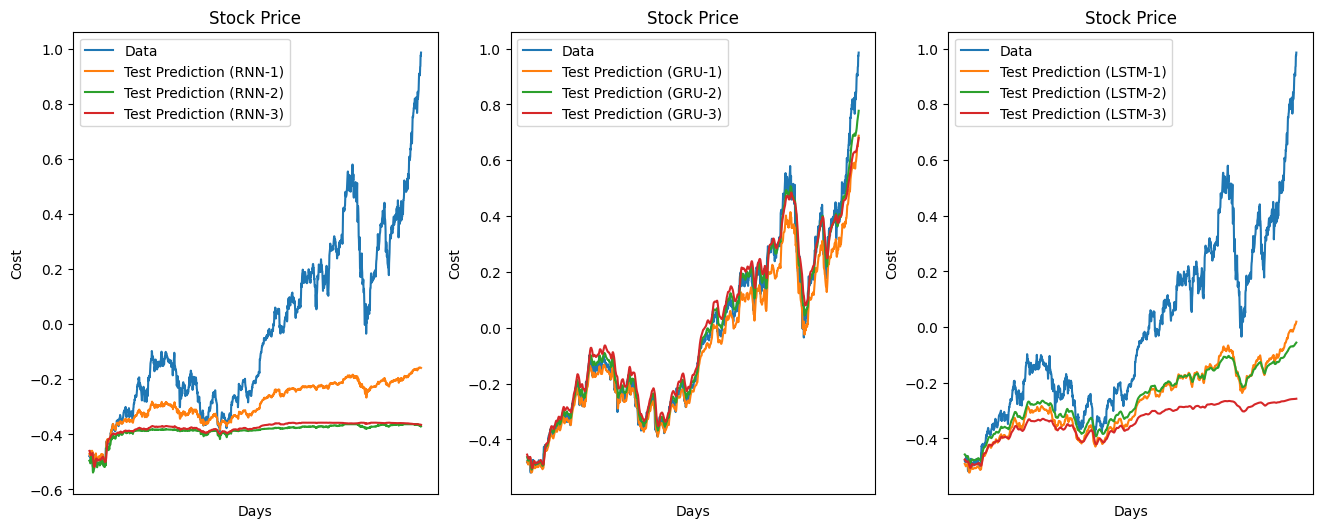

In [51]:
# display test predictions
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    ax[i].plot(range(test_y.shape[0]), test_y, label="Data")
    for o in models[i].keys():
        models[i][o].eval()
        out = models[i][o](test_x)
        ax[i].plot(range(out.shape[0]), out.detach(), label="Test Prediction ({})".format(o))
    ax[i].set_xticks([], color="white")
    ax[i].set_xlabel("Days")
    ax[i].set_ylabel("Cost")
    ax[i].set_title("Stock Price")
    ax[i].legend(loc="upper left")
plt.show()